In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns
%matplotlib inline
%config Completer.use_jedi = False

In [96]:
class LogisticRegression():
    def __init__(self,theta =None):
        self.theta = theta
    
    def lengthen(self,X):
        return np.c_[np.ones((len(X),1)), X]
    
    def sigmoid(self,z):
        return 1/(1 + np.exp(-z))
        
    def predict(self, X_test):
        X_test = self.lengthen(X_test)
        return self.sigmoid(np.matmul(X_test,self.theta))
    
    def h(self,X):
        return self.sigmoid(np.dot(X,self.theta))
    
    def compute_cost(self,X,y):
        m = len(X)
        X = self.lengthen(X)
        J = (-1/m)* sum( (y*np.log(self.h(X))) + ( (1-y)* np.log(1- self.h(X))) )
        return J
    
    def compute_gradient(self,X,y):
        m = len(X)
        X = self.lengthen(X)
        grad_J = (1/m)* np.dot(X.T,(self.h(X)-y))
        return grad_J
    
    def fit(self, X, y, alpha =0.001, num_iters = 1000, tol = 1e-4):
        J_history = []
        self.theta = np.zeros((X.shape[1]+1,1))
        for iteration in range(num_iters):
            J_history.append(self.compute_cost(X,y))
            if abs(J_history[-1])<tol:
                break
            grad_J = self.compute_gradient(X,y)
            self.theta = self.theta - alpha*grad_J
        
        return J_history

## Logistic Regression on Linearly Inseparable data

In [3]:
df = pd.read_csv('data/linearly_inseparable.txt',sep=',', header= None, names= 'x1 x2 y'.split())

In [4]:
df.head()

,x1,x2,y
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      118 non-null    float64
 1   x2      118 non-null    float64
 2   y       118 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


In [6]:
df.groupby('y').count()

,x1,x2
y,,
0,60,60
1,58,58


### Visualize the dataset

<AxesSubplot:xlabel='x1', ylabel='x2'>

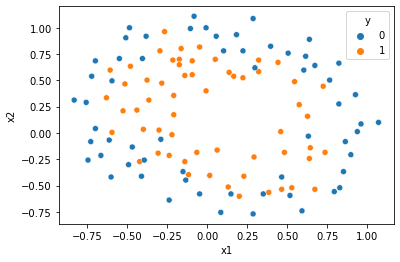

In [7]:
sns.scatterplot(data = df, x = 'x1', y = 'x2', hue = 'y')

In [85]:
X = np.array(df[['x1','x2']])
y = np.array(df[['y']])

### Sklearn classifier based on LBFGS

In [92]:
from sklearn.linear_model import LogisticRegression

In [93]:
clf2 = LogisticRegression(random_state=0).fit(poly_X, y.flatten())

In [94]:
y_preds = clf2.predict(poly_X)

In [95]:
np.mean(y.flatten()==y_preds)

0.8305084745762712

Data is already in consistent scale across both features

In [86]:
print(np.min(X, axis =0), np.max(X, axis =0))

[-0.83007 -0.76974] [1.0709 1.1089]


In order to obtain a non-linear decision boundary using Logistic Regression, we need higher order polynomial terms of the features, such as quadratic, cubic and so on.

In [87]:
def min_max_scaler(X):
    """Scales the given X feature vector in the range of [0,1].
        For each feature x_j, 
            x_j_new = (x_j - x_j_min)/(x_j_max - x_j_min)"""
    X_min = np.min(X,axis = 0)
    X_max = np.max(X,axis = 0)
    return (X-X_min)/(X_max - X_min)

### Synthesis polynomial features

In [88]:
def get_polynomial_features(X, max_degree):
    cols = [np.array([X[:,0]**i *X[:,1]**j]).T for i in range(0,max_degree+1) for j in range(0,max_degree+1) if((i,j)!=(0,0))]
    return np.column_stack(cols)

In [89]:
poly_X = get_polynomial_features(X,12)

#### Scale the obtained features

In [90]:
poly_X = min_max_scaler(poly_X)

### Fit logistic regression 

In [97]:
clf = LogisticRegression()

In [98]:
J_history = clf.fit(poly_X,y, alpha = 1, num_iters= 10000)

<AxesSubplot:title={'center':'Training Loss trend'}, xlabel='iters', ylabel='J'>

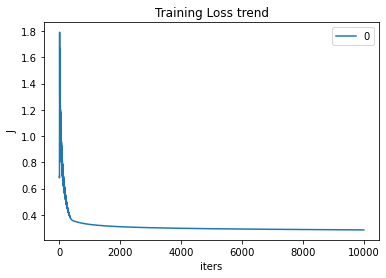

In [99]:
pd.DataFrame(J_history).plot(xlabel ='iters', ylabel= 'J', title = 'Training Loss trend')

In [100]:
clf.theta

array([[ 2.43743071],
       [ 7.70920259],
       [-8.11595668],
       [ 0.0796726 ],
       [-6.77463755],
       [-0.21495929],
       [-3.08478839],
       [ 0.13914214],
       [-1.16647146],
       [ 0.27709218],
       [-0.38022325],
       [ 0.21701505],
       [-0.14809771],
       [ 3.82210385],
       [-7.52476898],
       [ 1.6685097 ],
       [-2.98891089],
       [-3.50515277],
       [-3.05069636],
       [-3.9325179 ],
       [-2.89340343],
       [-3.46338169],
       [-2.65246107],
       [-2.87685116],
       [-2.31604436],
       [-2.33048049],
       [-7.47684353],
       [ 3.54981566],
       [ 0.22739918],
       [-0.13421069],
       [-4.06378107],
       [ 0.02092138],
       [-2.40745617],
       [ 0.94703512],
       [-0.29439128],
       [ 1.7463838 ],
       [ 1.14587778],
       [ 2.29466163],
       [ 2.00410787],
       [ 2.06198612],
       [-0.21718962],
       [ 6.47762475],
       [ 2.13202367],
       [ 2.18718618],
       [ 2.0681757 ],
       [ 1

In [101]:
y_prob = clf.h(np.c_[np.ones((len(poly_X),1)),poly_X])

In [102]:
y_preds = [1 if prob>=0.5 else 0 for prob in y_prob]

In [103]:
np.mean(y_preds==y)

0.49956908934214306

#### The logistic regression model seems to suffer in fitting using Gradient descent. 
#### Let's use the BFGS Algorithm

In [72]:
# bfgs algorithm local optimization of a convex function
from scipy.optimize import minimize

def lengthen(X):
    return np.c_[np.ones((len(X),1)), X]
    
def sigmoid(z):
    return 1/(1 + np.exp(-z))

def h(X, theta):
    return sigmoid(np.dot(X,theta))

def compute_cost(theta,X,y):
        m = len(X)
        J = (-1/m)* sum( (y*np.log(h(X,theta))) + ( (1-y)* np.log(1- h(X,theta))))
        return J[0]

def compute_gradient(theta,X,y):
        m = len(X)
        grad_J = (1/m)* np.dot(X.T,(h(X,theta)-y))
        return grad_J

X = lengthen(poly_X)
theta = np.random.randn(X.shape[1],1)
print('Shape of theta:',theta.shape)
print('Shape of poly_X:', X.shape)
print('Shape of y:', y.shape)

# perform the bfgs algorithm search
result = minimize(fun = compute_cost, x0= theta , args = (X,y), method='BFGS')# ,jac=compute_gradient)


Shape of theta: (100, 1)
Shape of poly_X: (118, 100)
Shape of y: (118, 1)


In [73]:
# summarize the result
print('Status : %s' % result['message'])
print('Total Evaluations: %d' % result['nfev'])
# evaluate solution
solution = result['x']
evaluation = compute_cost(solution,X,y)
print('Solution: f(%s) = %.5f' % (solution, evaluation))

Status : Optimization terminated successfully.
Total Evaluations: 505
Solution: f([ 6.87037793e-02 -5.97906868e-01 -1.01828182e+00  9.49634054e-01
  5.57301528e-03  7.34403504e-01 -1.27347556e+00  1.11790714e-01
 -6.71591875e-01 -7.46831863e-01 -8.76220764e-01 -1.23654522e+00
  3.51374610e-01  5.57136925e-01 -8.57505071e-01 -1.47582432e-01
  8.43558353e-01 -9.27484245e-01  7.27817075e-04  9.91439656e-01
 -1.48047812e+00 -8.02665576e-01 -8.98204719e-01 -1.10092438e+00
  8.18001218e-03  1.29660663e+00  1.18997447e-01 -8.15664293e-01
 -3.52883573e-01 -6.00733296e-01 -1.22903728e-01  3.13625489e-01
 -3.78201132e-01  8.75541220e-01  1.43336497e+00  1.85289506e+00
  1.04361510e+00  1.34846200e+00  4.77836104e-01 -9.79560100e-01
  6.38850105e-01  1.10285664e+00  7.64786300e-01 -9.04330667e-02
 -3.70497367e-01 -2.32439151e-01 -1.36498074e-01 -1.22136895e+00
  5.03468689e-01 -9.30423679e-01  4.63721581e-01 -7.84665335e-01
 -7.65968554e-01  2.10985432e+00  2.40216456e+00 -1.48502086e+00
  4.0742

In [28]:
compute_cost(result['x'],X,y)

0.6930035367960162

In [29]:
compute_gradient(theta,X,y).shape

(36, 1)

In [80]:
y_classify = [1 if y>=0.5 else 0 for y in y_preds]

In [81]:
np.mean(y_classify==y)

0.5001436368859523

### Plot decision boundary

    % Here is the grid range
    u = linspace(-1, 1.5, 50);
    v = linspace(-1, 1.5, 50);

    z = zeros(length(u), length(v));
    % Evaluate z = theta*x over the grid
    for i = 1:length(u)
        for j = 1:length(v)
            z(i,j) = mapFeature(u(i), v(j))*theta;
        end
    end
    z = z'; % important to transpose z before calling contour

    % Plot z = 0
    % Notice you need to specify the range [0, 0]
    contour(u, v, z, [0, 0], 'LineWidth', 2)
end

In [ ]:
u = np.linspace(-1,1.5,50)
v = np.linspace(-1,1.5,50)

z= np.zeros((len(u),len(v)))

for i in range(len(u)):
    for j in range(len(v)):
        z[i,j] = np.matmul(np.c_[1,get_polynomial_features(np.c_[u[i],v[i]],6)], clf.theta)
        
        z[i,j] = 1/(1 + np.exp(-z[i,j]))

In [ ]:
z = z.T

In [ ]:
z = z.T
plt.contour(u,v,z,400)